In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df_O3.csv")
#df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

County            object
Max 8-Hour O3    float64
dtype: object

In [3]:
df.head()

,County,Max 8-Hour O3
0,Cook,0.029
1,Cook,0.020
2,Cook,0.016
3,Cook,0.018
4,Cook,0.024


In [4]:
df.isnull().sum()  #no null values in dataframe

County           0
Max 8-Hour O3    0
dtype: int64

In [5]:
df.value_counts().sum()

3606

In [6]:
df.head()

,County,Max 8-Hour O3
0,Cook,0.029
1,Cook,0.020
2,Cook,0.016
3,Cook,0.018
4,Cook,0.024


In [7]:
#0.06ppm results in inflammation of the respiratory system; seems like a reasonable threshold
df['ozone_concern'] = [1 if x >=0.06 else 0 for x in df['Max 8-Hour O3']]
df['ozone_threshold'] = [1 if x >=0.07 else 0 for x in df['Max 8-Hour O3']]

df.head()

,County,Max 8-Hour O3,ozone_concern,ozone_threshold
0,Cook,0.029,0,0
1,Cook,0.020,0,0
2,Cook,0.016,0,0
3,Cook,0.018,0,0
4,Cook,0.024,0,0


In [8]:
print(df['ozone_concern'].value_counts())  #2819 unconcerned, 787 concerned days of total distribution
print(df['ozone_threshold'].value_counts()) #3286 below EPA threshold, 320 above EPA threshold

0    2819
1     787
Name: ozone_concern, dtype: int64
0    3286
1     320
Name: ozone_threshold, dtype: int64


In [9]:
#Add 2019 population date from Census.gov
pop_df = pd.read_csv("Census_Populations_2019-alldata.csv")
pop_df.head()
pop_df.columns
pop_df = pop_df[['COUNTY','STNAME','CTYNAME','POPESTIMATE2019']]
county_codes = [13,37,59,73,65,31,113,201,81,86]
States = ['Texas', 'California','Illinois','Florida','New York','Arizona']
pop_df1 = pop_df[pop_df['STNAME'].isin(States)]
pop_df2 = pop_df1[pop_df1['COUNTY'].isin(county_codes)]
CTYNAME = ['Maricopa County','Riverside County', 'Los Angeles County','Orange County','San Diego County',
          'Dallas County','Harris County','Cook County','Miami-Dade County','Queens County']

len(CTYNAME)
pop_df3 = pop_df2[pop_df2['CTYNAME'].isin(CTYNAME)]
pop_df3.head(11)
pop_df=pop_df3
pop_df.head(2)
pop_df["pop_per_mill"] = (pop_df.POPESTIMATE2019/int(1000000))
pop_df.head(2)
pop_df = pop_df[['CTYNAME','pop_per_mill']]
pop_df.head(10)

C:\Users\srubin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CTYNAME,pop_per_mill
106,Maricopa County,4.485414
209,Los Angeles County,10.039107
220,Orange County,3.175692
223,Riverside County,2.470546
227,San Diego County,3.338330
372,Miami-Dade County,2.716940
624,Cook County,5.150233
1901,Queens County,2.253858
2623,Dallas County,2.635516
2667,Harris County,4.713325


In [10]:
import numpy as np
values = [5.15,2.64,4.71,10.04,4.49,2.72,3.18,2.25,2.47,3.34]
print(np.median(values))

3.26


In [11]:
df.County.unique()

array(['Cook', 'Dallas', 'Harris', 'Los Angeles', 'Maricopa',
       'Miami-Dade', 'Orange', 'Queens', 'Riverside', 'San Diego'],
      dtype=object)

In [12]:
conditions = [
    (df['County'] == 'Cook'),
    (df['County'] == 'Dallas'),
    (df['County'] == 'Harris'),
    (df['County'] == 'Los Angeles'),
    (df['County'] == 'Maricopa'),
    (df['County'] == 'Miami-Dade'),
    (df['County'] == 'Orange'),
    (df['County'] == 'Queens'),
    (df['County'] == 'Riverside'),
    (df['County'] == 'San Diego')
]

In [13]:
import numpy as np
df['pop_per_mill'] = np.select(conditions, values)

In [14]:
df.head()

,County,Max 8-Hour O3,ozone_concern,ozone_threshold,pop_per_mill
0,Cook,0.029,0,0,5.15
1,Cook,0.020,0,0,5.15
2,Cook,0.016,0,0,5.15
3,Cook,0.018,0,0,5.15
4,Cook,0.024,0,0,5.15


In [15]:
#categorize the population at less or more than 4mill
df['popSize'] = ["less3.26" if x < 3.26 else "greater3.26" for x in df['pop_per_mill']]
df.popSize.unique()
df.head(2)

,County,Max 8-Hour O3,ozone_concern,ozone_threshold,pop_per_mill,popSize
0,Cook,0.029,0,0,5.15,greater3.26
1,Cook,0.020,0,0,5.15,greater3.26


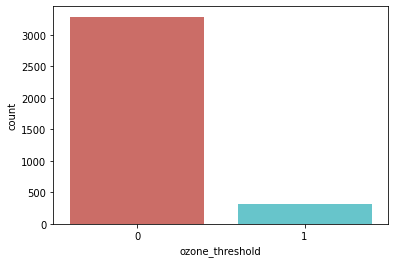

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='ozone_threshold',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot')

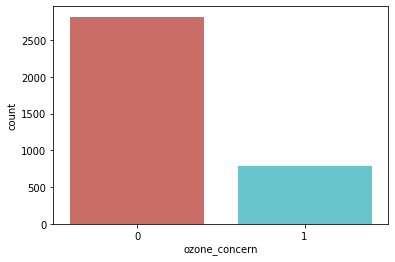

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='ozone_concern',data=df, palette='hls')
plt.show()

In [18]:
df.groupby('ozone_threshold').mean()

,Max 8-Hour O3,ozone_concern,pop_per_mill
ozone_threshold,,,
0,0.044495,0.142118,4.015606
1,0.078897,1.000000,5.016125


In [19]:
df.groupby('County').mean()

,Max 8-Hour O3,ozone_concern,ozone_threshold,pop_per_mill
County,,,,
Cook,0.040880,0.105714,0.025714,5.15
Dallas,0.042069,0.104396,0.019231,2.64
Harris,0.043712,0.159341,0.076923,4.71
Los Angeles,0.057297,0.417582,0.225275,10.04
Maricopa,0.055239,0.346154,0.101648,4.49
Miami-Dade,0.034528,0.011173,0.005587,2.72
Orange,0.049140,0.167582,0.035714,3.18
Queens,0.037583,0.062857,0.014286,2.25
Riverside,0.061357,0.521978,0.304945,2.47


Text(0, 0.5, 'Frequency of Days >0.06ppm')

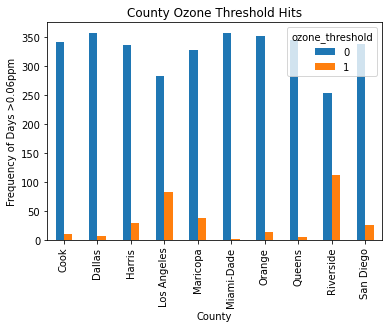

In [20]:
pd.crosstab(df.County,df.ozone_threshold).plot(kind='bar')
plt.title('County Ozone Threshold Hits')
plt.xlabel('County')
plt.ylabel('Frequency of Days >0.06ppm')
#plt.savefig('purchase_fre_job')

#Riverside, Maricopa, and LA counties seem to be the worst for ozone health days

Text(0, 0.5, 'Frequency')

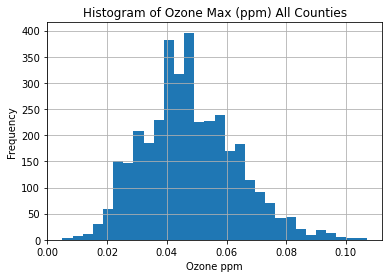

In [21]:
df['Max 8-Hour O3'].hist(bins=30)
plt.title("Histogram of Ozone Max (ppm) All Counties")
plt.xlabel('Ozone ppm')
plt.ylabel('Frequency')

In [22]:
'''df.head()  # drop the index
df_resetIndex1 = df.reset_index(drop=True)
df_resetIndex1.head()
df=df_resetIndex1
df.head(2)'''

'df.head()  # drop the index\ndf_resetIndex1 = df.reset_index(drop=True)\ndf_resetIndex1.head()\ndf=df_resetIndex1\ndf.head(2)'

In [23]:
df.head()

,County,Max 8-Hour O3,ozone_concern,ozone_threshold,pop_per_mill,popSize
0,Cook,0.029,0,0,5.15,greater3.26
1,Cook,0.020,0,0,5.15,greater3.26
2,Cook,0.016,0,0,5.15,greater3.26
3,Cook,0.018,0,0,5.15,greater3.26
4,Cook,0.024,0,0,5.15,greater3.26


In [24]:
df.County.unique()

array(['Cook', 'Dallas', 'Harris', 'Los Angeles', 'Maricopa',
       'Miami-Dade', 'Orange', 'Queens', 'Riverside', 'San Diego'],
      dtype=object)

In [42]:
#create dummy for 'popSize': 0: less than the median, 1:greater than the median
dummies1 = pd.get_dummies(df['County'])
dummies.head(10)
dummies.tail(10)

dummies2 = pd.get_dummies(df['popSize'])
dummies2.head()

df_updated = pd.concat([df, dummies1, dummies2], axis=1)
df_updated.head(10)

,County,Max 8-Hour O3,ozone_concern,ozone_threshold,pop_per_mill,popSize,Cook,Dallas,Harris,Los Angeles,Maricopa,Miami-Dade,Orange,Queens,Riverside,San Diego,greater3.26,less3.26
0,Cook,0.029,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
1,Cook,0.020,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
2,Cook,0.016,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
3,Cook,0.018,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
4,Cook,0.024,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
5,Cook,0.035,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
6,Cook,0.024,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
7,Cook,0.028,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
8,Cook,0.026,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0
9,Cook,0.026,0,0,5.15,greater3.26,1,0,0,0,0,0,0,0,0,0,1,0


In [43]:
df_updated.columns

Index(['County', 'Max 8-Hour O3', 'ozone_concern', 'ozone_threshold',
       'pop_per_mill', 'popSize', 'Cook', 'Dallas', 'Harris', 'Los Angeles',
       'Maricopa', 'Miami-Dade', 'Orange', 'Queens', 'Riverside', 'San Diego',
       'greater3.26', 'less3.26'],
      dtype='object')

In [46]:
#subset updated df
df_updated = df_updated[['Max 8-Hour O3', 'ozone_concern', 'ozone_threshold','Cook', 'Dallas', 'Harris', 'Los Angeles',
                        'Maricopa', 'Miami-Dade', 'Orange', 'Queens', 'Riverside', 'San Diego','greater3.26', 'less3.26']]
df_updated.head()
df=df_updated

In [47]:
df.dtypes

Max 8-Hour O3      float64
ozone_concern        int64
ozone_threshold      int64
Cook                 uint8
Dallas               uint8
Harris               uint8
Los Angeles          uint8
Maricopa             uint8
Miami-Dade           uint8
Orange               uint8
Queens               uint8
Riverside            uint8
San Diego            uint8
greater3.26          uint8
less3.26             uint8
dtype: object

In [54]:
#scaling 'Max 8-Hour O3'
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

scaled_features = df.copy()
col_names = ['Max 8-Hour O3']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features)
features = scaler.transform(features)

In [56]:
scaled_features[col_names] = features

In [59]:
scaled_features
df_scaled = scaled_features

In [60]:
df_scaled.head()

,Max 8-Hour O3,ozone_concern,ozone_threshold,Cook,Dallas,Harris,Los Angeles,Maricopa,Miami-Dade,Orange,Queens,Riverside,San Diego,greater3.26,less3.26
0,-1.175278,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-1.745555,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.999012,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,-1.872284,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-1.492099,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.


In [63]:
df_scaled.to_csv(r'C:/Users/srubin/Desktop/Springboard/CapstoneProject2/df_scaled.csv')

In [64]:
df_scaled.head(10)

,Max 8-Hour O3,ozone_concern,ozone_threshold,Cook,Dallas,Harris,Los Angeles,Maricopa,Miami-Dade,Orange,Queens,Riverside,San Diego,greater3.26,less3.26
0,-1.175278,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-1.745555,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.999012,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,-1.872284,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-1.492099,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,-0.795092,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6,-1.492099,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7,-1.238642,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,-1.365370,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9,-1.365370,0,0,1,0,0,0,0,0,0,0,0,0,1,0
